In [ ]:
# Goal: To develop a robust and accurate machine learning model capable of
#       classifying news articles or text snippets as either real or fake using
#       the power of transformer network architectures.

In [ ]:
# Library list
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [ ]:
fake_news = pd.read_csv(r'/content/Fake (1).csv')
true_news = pd.read_csv(r'/content/True.csv')

In [ ]:
fake_news.head(1)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"


In [ ]:
true_news.head(1)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"


In [ ]:
fake_news['status'] = "fake"
true_news['status'] = "true"

In [ ]:
data = pd.concat([fake_news, true_news], ignore_index=True)

In [ ]:
data.head(2)

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake


In [ ]:
data.isna().sum()

,0
title,0
text,0
subject,0
date,0
status,0


status
fake    23481
true    21417
Name: count, dtype: int64


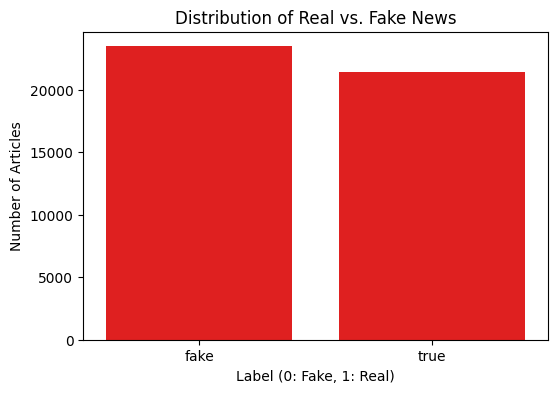

In [ ]:
# to check wether dataset is balanced or not
print(data['status'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=data, legend="auto", color="red")
plt.title('Distribution of Real vs. Fake News')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
data.describe()

,title,text,subject,date,status
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   status   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
data['date'].value_counts()

,count
date,
"December 20, 2017",182
"December 6, 2017",166
"November 30, 2017",162
"November 9, 2017",158
"October 13, 2017",155
...,...
"June 24, 2017",1
"Jul 19, 2015",1
"May 14, 2016",1


In [ ]:
# creating mew column with date data type
data['new_date'] = pd.to_datetime(data['date'], errors='coerce')          # format='%d-%B-%Y'

In [ ]:
# handeling different date format date
mask = data['new_date'].isna()
data.loc[mask, 'new_date'] = pd.to_datetime(data.loc[mask, 'date'], format='%d-%b-%y', errors='coerce')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     44898 non-null  object        
 1   text      44898 non-null  object        
 2   subject   44898 non-null  object        
 3   date      44898 non-null  object        
 4   status    44898 non-null  object        
 5   new_date  11903 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 2.1+ MB


In [ ]:
dup = data.duplicated()
print(dup.sum())

209


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
dup = data.duplicated()
print(dup.sum())

0


In [ ]:
data['len'] = data['text'].str.len()
print("Maximum text len : ",max(data['len']))
print("Minimum text len : ",min(data['len']))

Maximum text len :  51794
Minimum text len :  1


In [ ]:
data['title_len'] = data['title'].str.len()
print("Maximum text len : ",max(data['title_len']))
print("Minimum text len : ",min(data['title_len']))

Maximum text len :  286
Minimum text len :  8


In [ ]:
mintext = data[data['len'] == 1]
maxtext = data[data['len'] == 500000]

In [ ]:
maxtext['text'].head(1)

,text


In [ ]:
data.head(2)

,title,text,subject,date,status,new_date,len,title_len
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,2017-12-31,2893,79
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,2017-12-31,1898,69


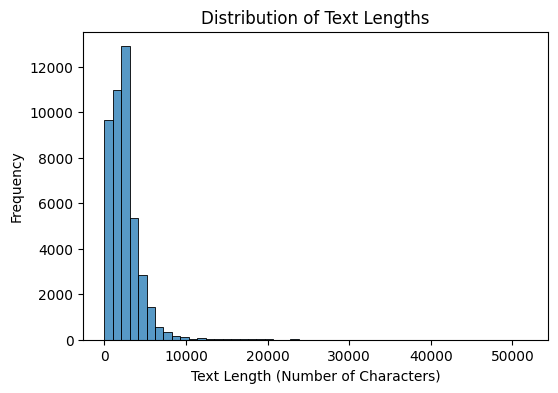

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data['len'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

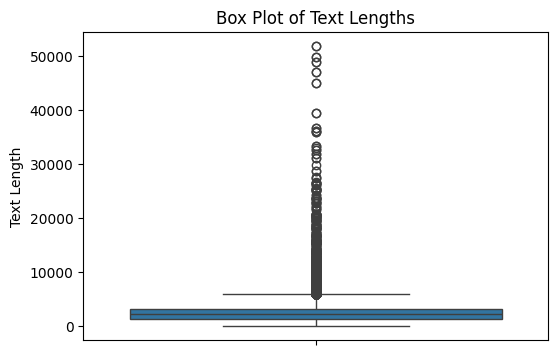

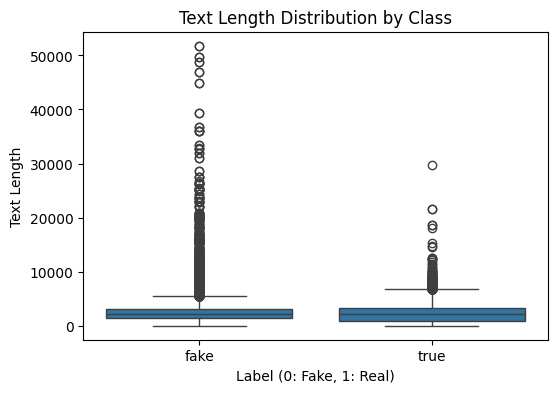

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['len'])
plt.title('Box Plot of Text Lengths')
plt.ylabel('Text Length')
plt.show()

# Optionally, analyze text length by class
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['status'], y=data['len'], data=data)
plt.title('Text Length Distribution by Class')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Text Length')
plt.show()


In [ ]:
from wordcloud import WordCloud, STOPWORDS

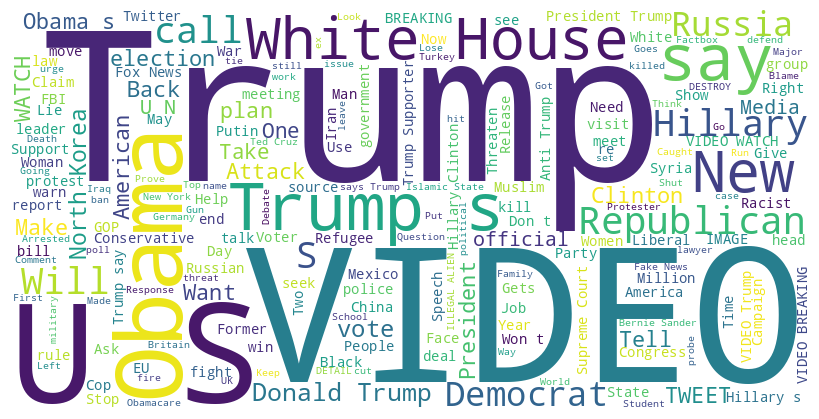

In [ ]:
# Create a WordCloud object
all_titles = ' '.join(data['title'].astype(str))

wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from bs4 import BeautifulSoup
import re
import string

def remove_html(text):
    """Removes HTML tags from text."""
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def remove_special_characters(text):
    """Removes special characters (non-alphanumeric and non-whitespace)."""
    pattern = r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '', text)

def remove_punctuation(text):
    """Removes punctuation using string.punctuation."""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def clean_text(text):
    """Applies all cleaning functions to the text."""
    if isinstance(text, str):  # Ensure the input is a string
        text = remove_html(text)
        text = remove_special_characters(text)
        text = remove_punctuation(text)
        return text
    return text  # Return non-string values as is


In [ ]:
data['title'] = clean_text(data['title'])

In [ ]:
data['text'] = clean_text(data['text'])

In [ ]:
data.head(1)

,title,text,subject,date,status,new_date,len,title_len
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,2017-12-31,2893,79


In [ ]:
data.rename(columns={'len': 'text_len'}, inplace=True)
data.columns

Index(['title', 'text', 'subject', 'date', 'status', 'new_date', 'text_len',
       'title_len'],
      dtype='object')

In [ ]:
data.drop(columns=['date'], inplace=True)

In [ ]:
data.columns

Index(['title', 'text', 'subject', 'status', 'new_date', 'text_len',
       'title_len'],
      dtype='object')

In [ ]:
# combining all columns in single one for tokenizing
data['all_text'] = data['title'] + ' ' + data['text'] + ' ' + data['subject'] + ' ' + data['new_date'].astype(str)

In [ ]:
data.columns

Index(['title', 'text', 'subject', 'status', 'new_date', 'text_len',
       'title_len', 'all_text'],
      dtype='object')

In [ ]:
binary_mapping = {'fake': 0, 'true': 1}
data['status'] = data['status'].map(binary_mapping)

In [ ]:
# First spliting the text than will do tokenizer
from sklearn.model_selection import train_test_split

text_list = data['all_text'].tolist()
labels = data['status'].tolist()

X_train, X_test, y_train, y_test = train_test_split(text_list, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
# using transofmers Autotokenizer to convert text into number vector
# specifically designed for pre-trained transformer models (like BERT, RoBERTa, etc.)

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
encoded_inputs_train = tokenizer(X_train, padding=True, truncation=True, return_tensors='np')
encoded_inputs_test = tokenizer(X_test, padding=True, truncation=True, return_tensors='np')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Model Selection and Implementation:
from transformers import AutoModelForSequenceClassification

num_labels = 2  # For binary fake/true classification
model_bert = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# All hyperparameter that used to train model
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # Where your trained model and checkpoints will be saved.
    learning_rate=2e-5,              # A crucial hyperparameter that controls the step size during optimization. Common values are in the range of 1e-5 to 5e-5 for fine-tuning Transformer models.
    per_device_train_batch_size=16,  # The number of training examples processed in parallel on each device (GPU/CPU). Adjust based on your hardware.
    #per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # The number of times the model will go through the entire training dataset. Start with a small number (e.g., 2-5) and adjust based on validation performance.
    weight_decay=0.01,               # Apply weight decay to prevent overfitting
    #evaluation_strategy='epoch',     # When to evaluate the model on the validation set. 'epoch' is a good starting point.
    #save_strategy='epoch',           # When to save model checkpoints. 'epoch' is common
    #load_best_model_at_end=True,     # Very useful to ensure you're using the model that performed best on the validation set.
    # metric_for_best_model='f1',      # The metric to use when deciding which checkpoint is the "best." F1-score is often a good choice for binary classification, especially with potential class imbalance.
    # logging_dir='./logs',            # Directory for training logs
    # logging_steps=100,               # Log metrics every X steps
    # report_to='tensorboard',         # Integration with logging tools like TensorBoard can help you visualize training progress.
    # # Add other arguments as needed, e.g.,
    # # gradient_accumulation_steps=2,   # Accumulate gradients over X steps to simulate larger batch sizes
    # # warmup_steps=500,                # Linear warmup over X steps
    # # save_total_limit=2,              # Only save the last X checkpoints
)

In [ ]:
import torch

class FakeNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx])
        }

train_dataset = FakeNewsDataset(encoded_inputs_train, y_train)
test_dataset = FakeNewsDataset(encoded_inputs_test, y_test)


#-------------------------------------------Alternate Option--------------------------------------
# from datasets import Dataset

# train_df = pd.DataFrame({'text': X_train, 'labels': y_train})              # creating dataframe
# test_df = pd.DataFrame({'text': X_test, 'labels': y_test})

# train_dataset = Dataset.from_pandas(train_df)                              # converting to hugging face dataset
# test_dataset = Dataset.from_pandas(test_df)

# def tokenize(example):                                                     # tokenize using map
#   return tokenizer(example['text'], truncation=True, padding='max_length')

# train_dataset = train_dataset.map(tokenize, batched=True)
# test_dataset = test_dataset.map(tokenize, batched=True)

# train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])             # formate it for Pytorch
# test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model_bert,                   # Your pre-trained model loaded with AutoModelForSequenceClassification
    args=training_args,                 # The TrainingArguments you defined
    train_dataset=train_dataset,        # Your training dataset (e.g., a Dataset object from Hugging Face Datasets)
    eval_dataset=test_dataset,           # Your validation dataset (e.g., a Dataset object from Hugging Face Datasets)
    compute_metrics = compute_metrics
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: deepakkpasi (deepakkpasi-hitachi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.044600
1000,0.004900
1500,0.001600
2000,0.002000
2500,0.002000
3000,0.000100
3500,0.000000
4000,0.000200
4500,0.002300
5000,0.000000


TrainOutput(global_step=6705, training_loss=0.004525949027025371, metrics={'train_runtime': 10896.4316, 'train_samples_per_second': 9.843, 'train_steps_per_second': 0.615, 'total_flos': 2.821945002052608e+16, 'train_loss': 0.004525949027025371, 'epoch': 3.0})

In [ ]:
metrics = trainer.evaluate()
metrics

{'eval_loss': 9.772476914804429e-06,
 'eval_accuracy': 1.0,
 'eval_f1': 1.0,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_runtime': 254.4389,
 'eval_samples_per_second': 35.128,
 'eval_steps_per_second': 4.394,
 'epoch': 3.0}

In [ ]:
trainer.save_model('./fake_news_model')

In [ ]:
model_bert.save_pretrained('./fake_news_model_bert')

In [ ]:
tokenizer.save_pretrained('./fake_news_tokenizer')

('./fake_news_tokenizer/tokenizer_config.json',
 './fake_news_tokenizer/special_tokens_map.json',
 './fake_news_tokenizer/vocab.txt',
 './fake_news_tokenizer/added_tokens.json',
 './fake_news_tokenizer/tokenizer.json')

In [ ]:
import shutil
from google.colab import files

shutil.make_archive('fake_news_model', 'zip', './fake_news_model')
shutil.make_archive('fake_news_model_bert', 'zip', './fake_news_model_bert')
shutil.make_archive('fake_news_tokenizer', 'zip', './fake_news_tokenizer')


files.download('fake_news_model.zip')
files.download('fake_news_model_bert.zip')
files.download('fake_news_tokenizer.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>